In [16]:
import numpy as np
import pandas as pd

## Reading data

In [17]:
train = pd.read_csv('../data/csv_files/train.csv')
test = pd.read_csv('../data/csv_files/test.csv')

print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [18]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [19]:
# get X_train and y_train from csv files
X_train = train.drop(['subject','Activity','ActivityName'], axis=1)
y_train = train.ActivityName

In [20]:
# get X_test and y_test from test csv files
X_test = test.drop(['subject','Activity','ActivityName'], axis =1)
y_test = test.ActivityName

In [21]:
print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')

X_train: (7352, 561) y_train: (7352,)
X_test: (2947, 561) y_test: (2947,)


## Modelling our data

In [29]:
lables = ['LAYING','SITTING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [23]:
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams['font.family'] = 'DejaVu Sans'

In [33]:
def plot_confusion_matrix(cm: np.ndarray, 
                          classes:list, 
                          normalize:bool =False, 
                          title:str ="Consusion Matrix", 
                          cmap:matplotlib.colors.LinearSegmentedColormap= plt.cm.Blues):
    if normalize:
        cm = cm.astype('float64') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### A general function to run any model specified

In [34]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize= True, print_cm=True, cm_cmap= plt.cm.Greens):
    # to store results at various phases
    results = dict()
    
    # time at which model starts training
    train_start_time = datetime.now()
    print("training the model...")
    model.fit(X_train, y_train)
    print('Done\n\n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time -train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    # Predict the test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    
    results['testing_time'] = test_end_time - test_start_time
    print('testing time (HH:HH:SS.ms) - {}'.format(results['testing_time']))
    results['predicted'] = y_pred
    
    # Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true = y_test, y_pred= y_pred)
    
    #store accuracy in results
    results['accuracy'] = accuracy
    print('-------------------------------')
    print('|         Accuracy            |')
    print('-------------------------------')
    print('\n     {}\n\n'.format(accuracy))
    
    # Confusion matrix
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('--------------------------------------')
        print('|          Confusion Matrix          |')
        print('---------------------------------------')
        print('\n {}'.format(cm))
        
    # Plot confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title= ' Normalized consusion matrix',cmap= cm_cmap)
    plt.show()
    
    # Get classification report
    print('-------------------------')
    print('|  Classification Report |')
    print('--------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [35]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('------------------------')
    print('|     Best parameters   |')
    print('-------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    
    #Parameters that gave best results while performing grid search
    print('---------------------------------')
    print('|        Best Parameters        |')
    print('----------------------------------')
    print('\n\tParameters of best estimator : \n\n{}\t'.format(model.best_params_))
    
    
    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of Crossvalidation sets    |')
    print('----------------------------------')
    print('\n\tTotal number of cross validation sets : \n\n{}\t'.format(model.n_splits_))
    
    # Average cross validation score of the best estimator, from the Grid Search
    print('---------------------------------')
    print('|        Best Score        |')
    print('----------------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n{}\t'.format(model.best_params_))

### 1. Logistic Regression with Grid Search

In [36]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/home/manisha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/manisha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Done


training_time(HH:MM:SS.ms) - 0:00:18.151458


Predicting test data
testing time (HH:HH:SS.ms) - 0:00:00.006335
-------------------------------
|         Accuracy            |
-------------------------------

     0.9582626399728538


--------------------------------------
|          Confusion Matrix          |
---------------------------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]


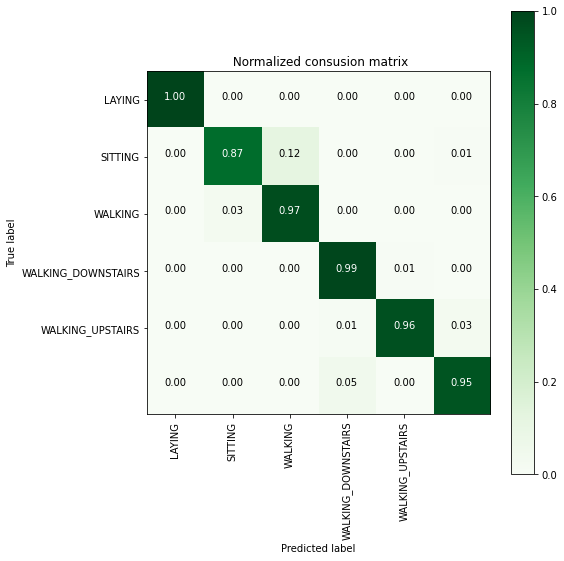

-------------------------
|  Classification Report |
--------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [37]:
# Start Grid Search
parameters = {'C': [0.01, 0.1,1,10,20,30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid= parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=lables)

/tmp/ipykernel_7431/1164664256.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


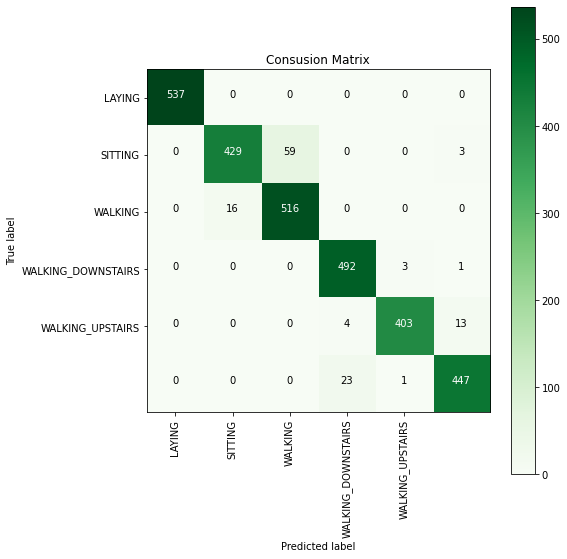

In [38]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes= lables, cmap = plt.cm.Greens)
plt.show()

In [39]:
# Observe the attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

------------------------
|     Best parameters   |
-------------------------

	LogisticRegression(C=1)

---------------------------------
|        Best Parameters        |
----------------------------------

	Parameters of best estimator : 

{'C': 1, 'penalty': 'l2'}	
---------------------------------
|   No of Crossvalidation sets    |
----------------------------------

	Total number of cross validation sets : 

3	
---------------------------------
|        Best Score        |
----------------------------------

	Average Cross Validate scores of best estimator : 

{'C': 1, 'penalty': 'l2'}	


### 2. Linear SVC with GridSearch

In [40]:
from sklearn.svm import LinearSVC

In [ ]:
parameters = {'C':}